<a href="https://colab.research.google.com/github/dhanashrihogale23/dhanashri_23-Oasisinfobyte_project/blob/main/SalesPrediction%20using%20python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')

In [ ]:
df=pd.read_csv('Advertising.csv')
df.head()

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [ ]:
df.shape

(200, 5)

In [ ]:
df.columns.values.tolist()

['Unnamed: 0', 'TV', 'Radio', 'Newspaper', 'Sales']

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  200 non-null    int64  
 1   TV          200 non-null    float64
 2   Radio       200 non-null    float64
 3   Newspaper   200 non-null    float64
 4   Sales       200 non-null    float64
dtypes: float64(4), int64(1)
memory usage: 7.9 KB


In [ ]:
df.describe()

,Unnamed: 0,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000,200.000000
mean,100.500000,147.042500,23.264000,30.554000,14.022500
std,57.879185,85.854236,14.846809,21.778621,5.217457
min,1.000000,0.700000,0.000000,0.300000,1.600000
25%,50.750000,74.375000,9.975000,12.750000,10.375000
50%,100.500000,149.750000,22.900000,25.750000,12.900000
75%,150.250000,218.825000,36.525000,45.100000,17.400000
max,200.000000,296.400000,49.600000,114.000000,27.000000


In [ ]:
df.isnull().sum()

Unnamed: 0    0
TV            0
Radio         0
Newspaper     0
Sales         0
dtype: int64

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

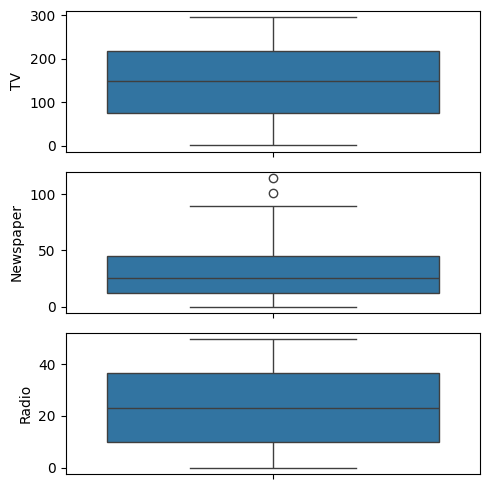

In [ ]:
fig,axs= plt.subplots(3,figsize = (5,5))
plt1 = sns.boxplot(df['TV'],ax = axs[0])
plt2 = sns.boxplot(df['Newspaper'],ax = axs[1])
plt3 = sns.boxplot(df['Radio'],ax = axs[2])
plt.tight_layout()



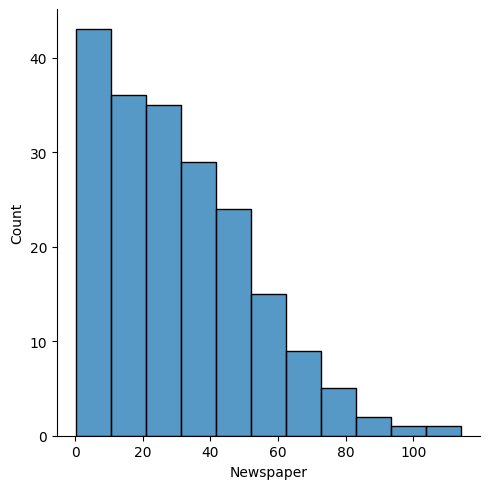

In [ ]:
sns.displot(df['Newspaper'])

In [ ]:
iqr = df.Newspaper.quantile(0.75) - df.Newspaper.quantile(0.25)

In [ ]:
lower_bridge = df["Newspaper"].quantile(0.25)-(iqr*1.5)
upper_bridge = df["Newspaper"].quantile(0.75)+(iqr*1.5)
print(lower_bridge)
print(upper_bridge)

-35.775000000000006
93.625


In [ ]:
data = df.copy()

In [ ]:
data.loc[data['Newspaper']>=93,'Newspaper']=93

<Axes: ylabel='Newspaper'>

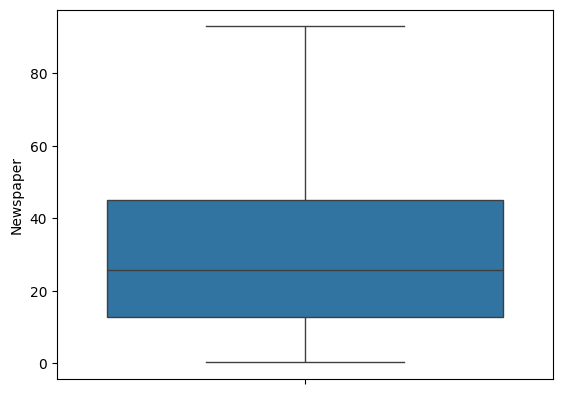

In [ ]:
sns.boxplot(data['Newspaper'])

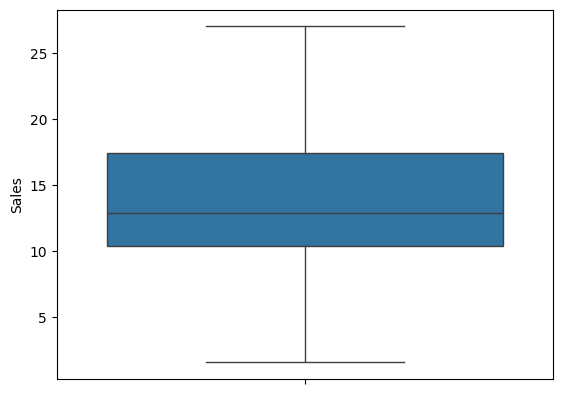

In [ ]:
sns.boxplot(data['Sales']);

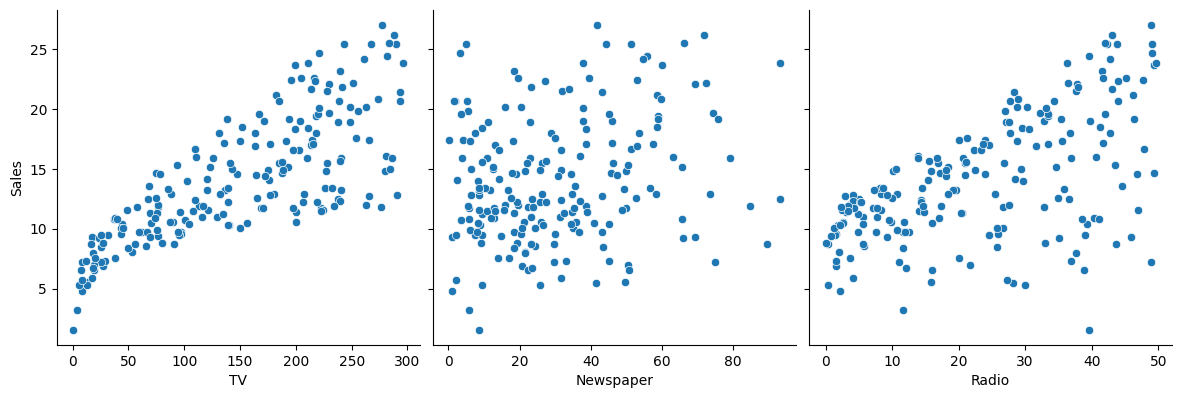

In [ ]:
sns.pairplot(data, x_vars=['TV','Newspaper','Radio'],
             y_vars='Sales',height=4, aspect=1, kind='scatter')
plt.show()


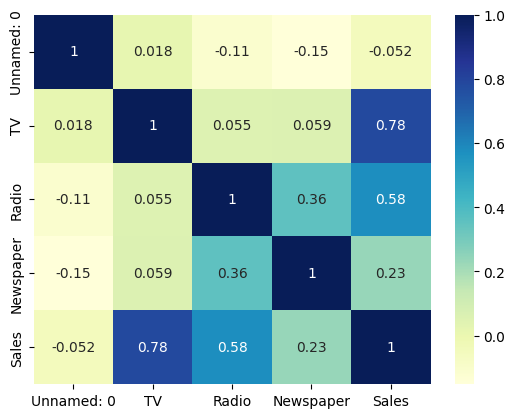

In [ ]:
sns.heatmap(data.corr(),cmap="YlGnBu",annot = True)
plt.show()

In [ ]:
important_features = list(df.corr()['Sales'][(df.corr()['Sales']>+0.5)|(df.corr()['Sales']<-0.5)].index)

In [ ]:
print(important_features)

['TV', 'Radio', 'Sales']


In [ ]:
x = data['TV']
y = data['Sales']

In [ ]:
x = x.values.reshape(-1,1)

In [ ]:
x

array([[230.1],
       [ 44.5],
       [ 17.2],
       [151.5],
       [180.8],
       [  8.7],
       [ 57.5],
       [120.2],
       [  8.6],
       [199.8],
       [ 66.1],
       [214.7],
       [ 23.8],
       [ 97.5],
       [204.1],
       [195.4],
       [ 67.8],
       [281.4],
       [ 69.2],
       [147.3],
       [218.4],
       [237.4],
       [ 13.2],
       [228.3],
       [ 62.3],
       [262.9],
       [142.9],
       [240.1],
       [248.8],
       [ 70.6],
       [292.9],
       [112.9],
       [ 97.2],
       [265.6],
       [ 95.7],
       [290.7],
       [266.9],
       [ 74.7],
       [ 43.1],
       [228. ],
       [202.5],
       [177. ],
       [293.6],
       [206.9],
       [ 25.1],
       [175.1],
       [ 89.7],
       [239.9],
       [227.2],
       [ 66.9],
       [199.8],
       [100.4],
       [216.4],
       [182.6],
       [262.7],
       [198.9],
       [  7.3],
       [136.2],
       [210.8],
       [210.7],
       [ 53.5],
       [261.3],
       [

In [ ]:
y

0      22.1
1      10.4
2       9.3
3      18.5
4      12.9
       ... 
195     7.6
196     9.7
197    12.8
198    25.5
199    13.4
Name: Sales, Length: 200, dtype: float64

In [ ]:
print(x.shape,y.shape)

(200, 1) (200,)


In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.33)

In [ ]:
print(x_train.shape,y_train.shape)

(134, 1) (134,)


In [ ]:
from sklearn.metrics import mean_squared_error,r2_score
from sklearn.model_selection import cross_val_score,GridSearchCV
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

In [ ]:

# Create and fit the KNeighborsRegressor
knn = KNeighborsRegressor().fit(x_train, y_train)
knn

KNeighborsRegressor()

In [ ]:

# Use the fitted model to make predictions
knn_train_pred = knn.predict(x_train)

In [ ]:
knn_test_pred = knn.predict(x_test)

In [ ]:
print(knn_train_pred, knn_test_pred)

[14.42 15.96  5.96 11.44 11.1  20.02 15.92 19.54 12.84  7.52 20.96 10.04
 14.42  8.66 12.84 12.2  16.06 17.06 14.5  12.38  4.84 16.82 10.2  13.22
 18.9   8.52  5.96 10.04 11.44  5.96 10.18 12.54 15.28 11.1  18.9   6.04
  8.66 13.94  7.52 23.48 12.16 15.64 10.04 11.44 11.74 10.04 20.86 14.98
 12.82 14.92 11.28 14.5  13.02 19.74 12.2   6.68 12.44 13.22 11.22 12.54
  7.38 21.78 20.22 14.34 12.2  16.92 14.52  5.96 15.92 11.24 14.92 10.06
 17.06 19.74 17.3  12.54 17.54  7.38 15.92  9.9  20.54 19.54  9.62 18.92
 20.02 18.9   6.68 12.4  14.5   8.66  9.78 18.3  13.02 18.3  17.3  12.56
 13.22 11.1  21.16 21.62  5.96 19.54  7.52 21.16 12.04 14.92  7.38 14.02
 17.54 15.84 20.82 12.2  17.54 18.72 17.3  11.28 12.16 15.08 21.16 11.8
 15.92 20.86 10.06  9.78 17.52 11.44 17.06 18.92 11.28 11.1  15.92  8.66
 14.34 13.34] [12.16 12.16  9.7   8.98  7.52 11.44 12.84 14.52 15.   15.04 14.92 14.92
 10.18 15.84 17.06 12.2  17.06 14.92 19.86  9.9  15.64 17.06  5.96 20.96
 13.02 15.92 20.82 15.92 21.16 21.62 1

In [ ]:
Results = pd.DataFrame(columns=["Model","Train R2","Test R2","Test RMSE","Variance"])

In [ ]:
r2 = r2_score(y_test,knn_test_pred)
r2_train = r2_score(y_train,knn_train_pred)
rmse = np.sqrt(mean_squared_error(y_test,knn_test_pred))
variance = r2_train - r2
Results = Results.append({"Model":"K-Nearest Neighbours","Train R2":r2,"Test R2":r2,"Test RMSE":rmse,"Variance":variance},ignore_index=True)
print("R2",r2)
print("RMSE",rmse)

R2 0.43664980025263966
RMSE 3.6882721584980023


In [ ]:
Results.head()

,Model,Train R2,Test R2,Test RMSE,Variance
0,K-Nearest Neighbours,0.43665,0.43665,3.688272,0.243592


In [ ]:
svr = SVR().fit(x_train,y_train)
svr

SVR()

In [ ]:
svr_train_pred = svr.predict(x_train)
svr_test_pred = svr.predict(x_test)

In [ ]:
print(svr_train_pred,svr_test_pred)

[14.99415459 16.50008725  7.43427232 10.39982535 11.50008721 17.74493174
 16.30821404 16.8795286  13.60371477  7.79049233 17.62392099  8.73382053
 14.99415459  8.02430312 13.52252164 13.09824576 16.09383656 17.97429667
 12.73108874 12.23370961  7.30985996 16.63731186  9.01519457 12.36516558
 17.22604293  7.96806623  7.45540513  8.65428983 10.33028962  7.44823115
 11.5370769  11.19412203 14.59686773 11.41363776 17.2661354   7.53413526
  8.04635726 17.52401496  7.76791484 17.44108295 10.6777073  14.88185115
  8.66484073 11.98091412 12.08672087  8.59657673 18.07783135 12.53170528
 12.92979069 14.404054   10.2141117  12.85444217 17.63857189 18.0911193
 13.05223227  7.57813681 12.19257296 12.33730198 11.65327355 11.1493493
  7.7348299  17.60118389 17.8251398  14.66017521 13.06472048 15.83942291
 15.22088446  7.45299945 16.34816137 11.73501233 14.49422521  9.83137687
 17.97429667 18.08751351 18.03283565 11.25029078 17.99201361  7.7097586
 16.22192085  8.9278683  18.08829236 16.93522375  9.64

In [ ]:
r2 = r2_score(y_test,svr_test_pred)
r2_train = r2_score(y_train,svr_train_pred)
rmse = np.sqrt(mean_squared_error(y_test,svr_test_pred))
variance = r2_train - r2
Results = Results.append({"Model":"Support Vector Machine","Train R2":r2,"Test R2":r2,"Test RMSE":rmse,"Variance":variance},ignore_index=True)
print("R2",r2)
print("RMSE",rmse)

R2 0.5579675637037955
RMSE 3.2670877815024544


In [ ]:
Results.head()

,Model,Train R2,Test R2,Test RMSE,Variance
0,K-Nearest Neighbours,0.436650,0.436650,3.688272,0.243592
1,Support Vector Machine,0.557968,0.557968,3.267088,0.033420


In [ ]:
import statsmodels.api as sm

In [ ]:
x_train_constant = sm.add_constant(x_train)

In [ ]:
model = sm.OLS(y_train, x_train_constant).fit()

In [ ]:
model.params

const    6.932984
x1       0.047876
dtype: float64

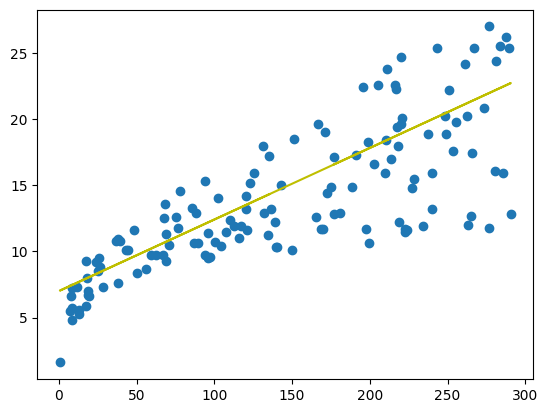

In [ ]:
plt.scatter(x_train,y_train)
plt.plot(x_train, 6.9955 + 0.0541 * x_train,'y')
plt.show()

In [ ]:
y_train_pred = model.predict(x_train_constant)
res = (y_train - y_train_pred)
res

41     1.692937
40    -0.027905
126   -0.706418
29     0.186960
144   -0.138670
         ...   
34    -2.014732
100   -5.880641
91    -1.002242
160   -0.791621
99     3.794160
Name: Sales, Length: 134, dtype: float64

In [ ]:
y_train_pred

array([15.40706332, 16.62790531,  7.30641762, 10.31304025, 11.53866986,
       20.18031613, 16.46512638, 16.96782602, 14.18622132,  7.86178103,
       20.37182076,  8.82409178, 15.40706332,  8.13467513, 14.10483186,
       13.65000837, 16.2879846 , 18.4280488 , 13.20954773, 12.54406915,
        6.9664969 , 16.7475957 ,  9.0730478 , 12.72599854, 17.31253435,
        8.07243612,  7.34950616,  8.75227755, 10.24601363,  7.33514331,
       11.58654602, 11.16044822, 15.08150545, 11.4285547 , 17.35562289,
        7.49313463,  8.1586132 , 17.65724268,  7.83305534, 20.62556439,
       10.59072196, 15.31609862,  8.76185278, 12.18978559, 12.33820168,
        8.69961377, 18.84457136, 12.95101648, 13.45371613, 14.91872652,
       10.13589847, 13.36275143, 17.81044638, 19.08395214, 13.5973446 ,
        7.56494886, 12.48661776, 12.68769762, 11.73974972, 11.10778445,
        7.7899668 , 20.40533407, 20.03668766, 15.13416922, 13.61170744,
       16.08211712, 15.58899271,  7.34471854, 16.49863969, 11.84

<Figure size 640x480 with 0 Axes>

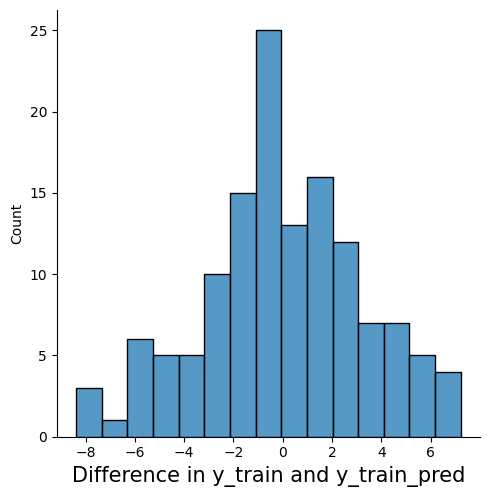

In [ ]:
fig = plt.figure()
sns.displot(res, bins = 15)
fig.suptitle('Error Terms',fontsize = 15)
plt.xlabel('Difference in y_train and y_train_pred',fontsize = 15)
plt.show()

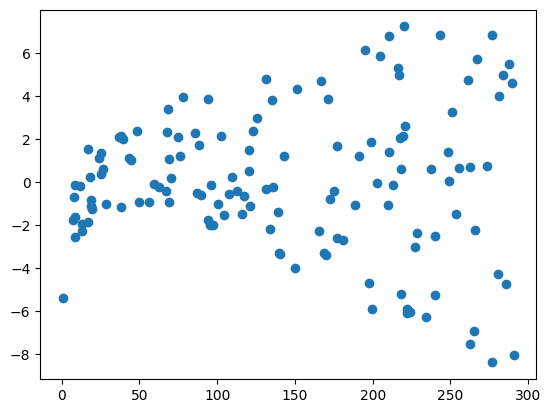

In [ ]:
plt.scatter(x_train,res)
plt.show()

In [ ]:
x_test_constant = sm.add_constant(x_test)
y_pred = model.predict(x_test_constant)

In [ ]:
y_pred

array([10.58593434, 10.54763342,  9.49435797,  8.44108253,  7.87135626,
       12.18978559, 14.10004424, 15.67516979, 15.78528495, 13.12815826,
       14.7607352 , 14.75115997, 11.60090886, 15.92412581, 18.29878318,
       13.69788452, 18.38974787, 14.80861136, 17.24550773,  8.99165833,
       15.34482431, 18.3370841 ,  7.19151484, 20.34788268, 17.8487473 ,
       16.49863969, 17.15454303, 16.39331214, 20.98942318, 20.54417492,
       10.59072196, 12.23287413, 13.98514146, 13.60213221,  7.74209064,
       16.70450716,  7.12927584, 10.53805819, 16.83377278, 16.20659513,
       18.50465065, 18.04503954, 10.50933249,  8.2495779 , 15.92891342,
       13.53510559, 18.41847357, 15.78528495, 10.77265136,  8.12988751,
       17.74341976,  9.06347256, 10.44709349, 20.95590987, 17.21199442,
       17.92056154,  9.6858626 , 16.18265705, 18.41368595, 10.09759755,
       17.94928723, 11.26098815, 21.12347642, 16.8385604 , 14.43038972,
       16.45555115])

In [ ]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [ ]:
np.sqrt(mean_squared_error(y_test,y_pred))

3.154134401092224

In [ ]:
r2 = r2_score(y_test,y_pred)
r2

0.588004073184434

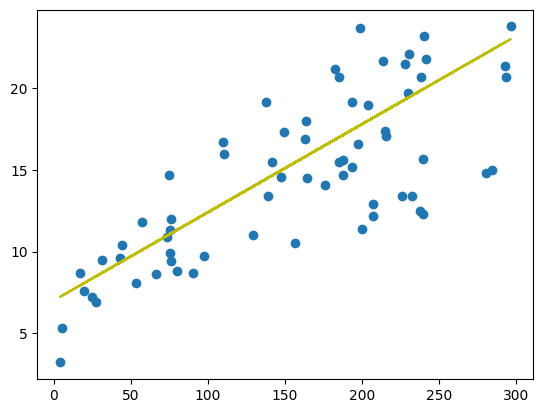

In [ ]:
plt.scatter(x_test,y_test)
plt.plot(x_test, 6.9955 + 0.0541 * x_test,'y')
plt.show()